## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns

## Loading Data

In [ ]:
data = pd.read_csv("crop_yield_states.csv")

**Categorical Variables** : Crop, Crop_Year, Season, State

**Numerical Variables** : Area, Production, Annual_Rainfall, Fertilizer, Pesticide

**Target Variable** : Yield

In [ ]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
data.shape

(19689, 10)

In [ ]:
data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
data.isna().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
data.dtypes

,0
Crop,object
Crop_Year,int64
Season,object
State,object
Area,float64
Production,int64
Annual_Rainfall,float64
Fertilizer,float64
Pesticide,float64
Yield,float64


In [ ]:
data.isnull().values.any()

np.False_

In [ ]:
data.State.unique()

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

## Data Preprocessing

In [ ]:
# Removing Production as it is derived from Area and Yield
df = data.drop(columns=['Production'])
df

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,1356.2,26242746.82,85481.26,0.016667


In [ ]:
# One-hot Encoding Categorical Variables
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'], drop_first=True)

## Features and Target Split

In [ ]:
X = df.drop(columns=['Yield'])
y = df['Yield']

## Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model

In [ ]:
results = {}

#### **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

xgb_rmse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
results['XGBoost'] = {'RMSE': xgb_rmse, 'R2': xgb_r2}

#### **LightGBM Regressor**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

# Define search grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15, -1],
    'num_leaves': [20, 31, 40, 50],
    'min_child_samples': [5, 10, 20],
    'min_split_gain': [0.0, 0.01, 0.1],
    'feature_fraction': [0.6, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.6, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Create model with only fixed params
lgbm = LGBMRegressor(random_state=42)

# Run randomized search
random_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit and predict
random_search.fit(X_train, y_train)
lgbm_model = random_search.best_estimator_
lgbm_pred = lgbm_model.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 15751, number of used features: 92
[LightGBM] [Info] Start training from score 80.138340
[LightGBM] [Warning] feature_frac

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)
# results['LGMRegressor'] = {'RMSE': lgbm_mse, "R2": lgbm_r2}
print(f"LGMRegressor: RMSE = {lgbm_mse}, R2: {lgbm_r2}")

LGMRegressor: RMSE = 46942.724776581315, R2: 0.9414123949237587


#### **RandomForest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_rmse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
results['RandomForestRegressor'] = {"RMSE":rf_rmse, "R2": rf_r2}

## Finding the Best Model

In [ ]:
# Comparison Output
print("\n📊 Model Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

# Optional: Find best model
best_model = min(results.items(), key=lambda x: x[1]['RMSE'])
print(f"\n✅ Best Model: {best_model[0]} with RMSE = {best_model[1]['RMSE']:.4f}, R² = {best_model[1]['R2']:.4f}")


📊 Model Comparison:
XGBoost: RMSE = 69786.2323, R² = 0.9129
LGMRegressor: RMSE = 61368.0132, R² = 0.9234
RandomForestRegressor: RMSE = 16019.2146, R² = 0.9800

✅ Best Model: RandomForestRegressor with RMSE = 16019.2146, R² = 0.9800


In [ ]:
new_raw_input = {
    'Crop': 'Potato',
    'Crop_Year': 1997,
    'Season': 'Whole Year',
    'State': 'Assam',
    'Area': 75259,
    'Annual_Rainfall': 2051.4,
    'Fertilizer': 892694.6,
    'Pesticide': 2907.8
}


new_df = pd.DataFrame([new_raw_input])
new_df_encoded = pd.get_dummies(new_df, columns=['Crop', 'Season', 'State'], drop_first=True)
new_df_encoded = new_df_encoded.reindex(columns=X_train.columns, fill_value=0)

predicted_yield = lgbm_model.predict(new_df_encoded)
print(f"🌾 Predicted Crop Yield: {predicted_yield[0]:.2f}")


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
🌾 Predicted Crop Yield: 0.51


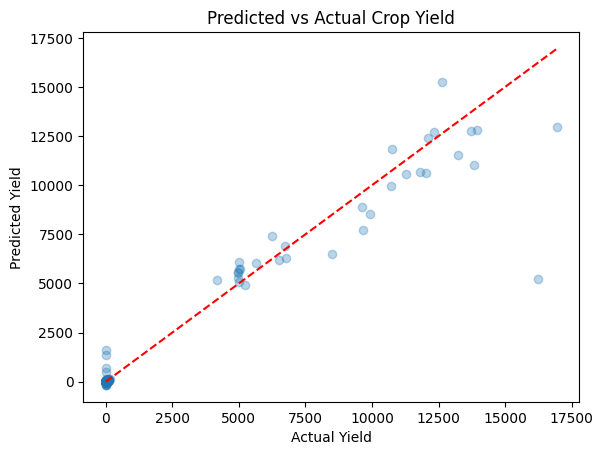

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lgbm_pred, alpha=0.3)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Crop Yield")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()
